In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import re
from numpy import linalg as LA
from time import time
from scipy import sparse
import matplotlib.pyplot as plt

/home/neo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'color'
  
/home/neo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'color'
  if __name__ == '__main__':
/home/neo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'color'
  # Remove the CWD from sys.path while we load stuff.
/home/neo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'color'
  # This is added back by InteractiveShellApp.init_path()


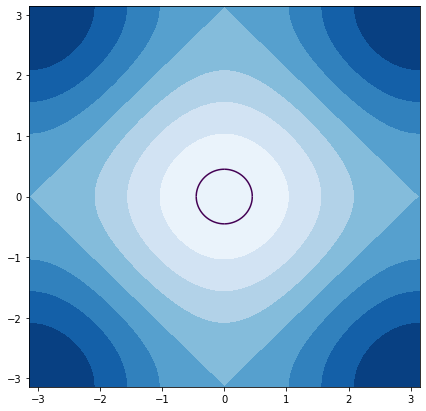

In [3]:
N=100
kx=np.linspace(0,np.pi,N)
ky=np.linspace(0,np.pi,N)
plt.rcParams['figure.figsize'] = [7,7]
Kx,Ky=np.meshgrid(kx,ky)
E=-2*(np.cos(Kx)+np.cos(Ky))
E_F=-3.8
CS=plt.contour(kx,ky,E,levels=[E_F],color='red')
plt.contour(-kx,ky,E,levels=[E_F],color='red')
plt.contour(-kx,-ky,E,levels=[E_F],color='red')
plt.contour(kx,-ky,E,levels=[E_F],color='red')
plt.contourf(kx,ky,E,cmap='Blues')
plt.contourf(-kx,ky,E,cmap='Blues')
plt.contourf(-kx,-ky,E,cmap='Blues')
plt.contourf(kx,-ky,E,cmap='Blues')
F = CS.collections[0].get_paths()[0]
coordsF = F.vertices
vF = np.dstack([2*np.sin(coordsF[:,0]),2*np.sin(coordsF[:,1])])[0]
vFmag = vF[:,0]*vF[:,0]+vF[:,1]*vF[:,1]
shatF  = vF/np.transpose([vFmag])
thetaF0 =  np.float64(np.arctan((vF[:,1]+1e-2)/(vF[:,0]+1e-2))) 
coordsFx_irr = coordsF[:,0]
coordsFy_irr = coordsF[:,1]
Lambda0=np.pi/np.sqrt(2)
steps=30000 #30000
eps=(1-1/(N*N)) #0.9999
lambdaF=Lambda0*eps**np.linspace(0,steps-1,steps)
ThetaF,LambdaF=np.meshgrid(thetaF0,lambdaF)
Fwvfx_out = coordsFx_irr+LambdaF*np.cos(ThetaF)
Fwvfy_out = coordsFy_irr+LambdaF*np.sin(ThetaF)
EFwvf=-2*(np.cos(Fwvfx_out)+np.cos(Fwvfy_out))

In [4]:
EFwvfAvg=np.sum(EFwvf,axis=1)/len(thetaF0)

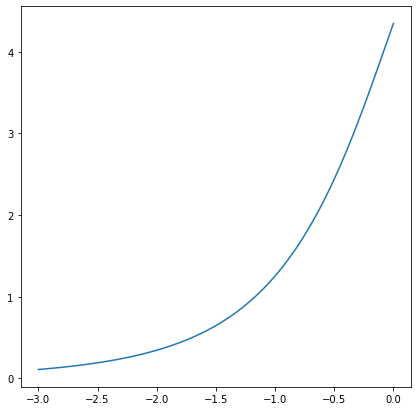

In [5]:
plt.plot(np.log(lambdaF/Lambda0),EFwvfAvg-E_F)

In [6]:
J=np.zeros(steps)
J_0=20
J[0]=J_0/(N*N)
k=0
for i in range(len(lambdaF)-1):
    Ek=(EFwvfAvg[i]-E_F)
    if(Ek-J[0]/4>0):
        if(Ek-J[i]/4.>0):
            J[i+1]=J[i]+4*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*Ek
        else:
            Jfixed=4*Ek
            k=i
            J[i:]=4*Ek
            break
    else:
        if(Ek-J[i]/4<0):
            J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
        else:
            Jfixed=4*Ek
            k=i
            J[i:]=4*Ek
            break       
        

In [7]:
Tk=(EFwvfAvg-E_F).max()*lambdaF[k]/Lambda0
print("Kondo Temp-",Tk)

Kondo Temp- 4.1784189388452875


In [8]:
Jfixed,k

(16.738797816125086, 387)

$E_{1}=\frac{1}{2}(-\frac{J}{2}+\sqrt{B^{2}+J^{2}})$, $E_{2}=\frac{1}{2}(-\frac{J}{2}-\sqrt{B^{2}+J^{2}})$<br>
$Z(B)=2\exp(\beta\frac{J}{4})\left[\cosh(\beta\frac{B}{2})+\cosh(\frac{\beta}{2}(\sqrt{B^{2}+J^{2}}))\right]$<br>
$\bar{Z}(B)=2\exp(-\beta\epsilon^{*})Z(B+J^{*})+(1+\exp(-2\beta\epsilon^{*}))Z(B)$<br>
$\frac{d\bar{Z}(B)}{dB}=(1+\exp(-2\beta\epsilon^{*}))\exp(\beta\frac{J}{4})\beta\left[\sinh(\beta\frac{B}{2})
+\frac{B}{\sqrt{B^{2}+J^{2}}}\sinh(\frac{\beta}{2}\sqrt{B^{2}+J^{2}})\right]$<br>
$+\exp(-\beta\epsilon^{*})\exp(-\beta\frac{J}{4})\beta\left[\sinh(\beta\frac{B+J^{*}}{2})+\frac{B+J^{*}}{\sqrt{(B+J^{*})^{2}+J^{2}}}\sinh(\frac{\beta}{2}\sqrt{(B+J^{*})^{2}+J^{2}})\right]$<br>
$M=\frac{k_{B}T}{Z(B)}\frac{dZ(B)}{dB}$<br>
<br>
$\frac{dM}{dB}=-\frac{k_{B}T}{(Z(B))^{2}}\left(\frac{dZ(B)}{dB}\right)^{2}+\frac{k_{B}T}{Z(B)}\frac{d^{2}Z(B)}{dB^{2}}$<br>
<br>
$\lim_{B\to 0}k_{B}T\frac{d^{2}Z(B)}{dB^{2}}=(1+\exp(-2\beta\epsilon^{*}))\exp(\beta\frac{J}{4})\left[\frac{\beta}{2}+\frac{1}{J}\sinh(\frac{\beta}{2}J)\right]$<br>
$+\exp(-\beta\epsilon^{*})\exp(\beta\frac{J}{4})\left[\frac{\beta}{2}\cosh(\beta\frac{J^{*}}{2})+\frac{1}{\sqrt{(J^{*})^{2}+J^{2}}}\sinh(\frac{\beta}{2}\sqrt{(J^{*})^{2}+J^{2}})-\frac{(J^{*})^{2}}{((J^{*})^{2}+J^{2})^{3/2}}\sinh(\frac{\beta}{2}\sqrt{(J^{*})^{2}+J^{2}})+\frac{\beta}{2}\frac{(J^{*})^{2}}{(J^{*})^{2}+J^{2}}\cosh(\frac{\beta}{2}\sqrt{(J^{*})^{2}+J^{2}})\right]$<br>

$\lim_{B\to 0}\frac{dM}{dB}=\frac{(\frac{\beta}{4}+\frac{1}{2J}\sinh(\frac{\beta}{2}J))(1+\cosh(\frac{\beta}{2}J))}{(1+\cosh(\frac{\beta}{2}J))^{2}}-\frac{\beta}{4}\frac{1}{(1+\cosh(\frac{\beta}{2}J))^{2}}$<br>
$=\frac{\frac{\beta}{4}\cosh(\frac{\beta}{2}J)+\frac{1}{2J}\sinh(\frac{\beta}{2}J)(1+\cosh(\frac{\beta}{2}J))}{(1+\cosh(\frac{\beta}{2}J))^{2}}$

$4\chi(T=0)T_{k}=\frac{2T_{K}}{J^{*}}$
$\chi=\frac{\frac{\beta}{4}+\frac{1}{2J}\sinh\frac{\beta J}{2}}{1+\cosh\beta\frac{J}{2}}$, $\frac{d\chi}{dT}=-k_{B}\beta^{2}\frac{d\chi}{d\beta}$, $\frac{d\chi}{d\beta}=\frac{\frac{1}{4}+\frac{1}{4}\cosh\frac{\beta J}{2}}{1+\cosh\beta\frac{J}{2}}-\frac{(\frac{\beta}{4}+\frac{1}{2J}\sinh\frac{\beta J}{2})(\frac{J}{2}\sinh\frac{\beta J}{2})}{(1+\cosh\beta\frac{J}{2})^{2}}$

$\frac{d\chi}{d\beta}=\frac{1}{4}-\frac{1}{4}\frac{(1+\frac{2}{J\beta}\sinh\frac{\beta J}{2})(\frac{J\beta}{2}\sinh\frac{\beta J}{2})}{(1+\cosh\beta\frac{J}{2})^{2}}$ $\implies$ $(1+\cosh\beta\frac{J}{2})^{2}=\frac{J\beta}{2}\sinh\frac{\beta J}{2}+\sinh^{2}\frac{\beta J}{2}$<br>
$\frac{J\beta}{2}=x$ $\to$  $2+2\cosh x = x\sinh x$

In [10]:
Temp=np.linspace(2.9e-2,5000,100000)
kB=1
Jstar=Jfixed

In [11]:
Chi=(1/(4*kB*Temp)+(1/(2*Jstar))*np.sinh(Jstar/(2*kB*Temp)))/(1+np.cosh(Jstar/(2*kB*Temp)))

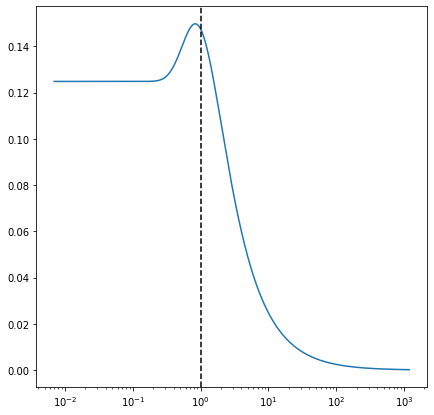

In [12]:
figure,ax=plt.subplots(1)
ax.set_xscale('log')
ax.plot(Temp/Tk,Chi*Tk)
ax.axvline(x=1,linestyle='--',color='k')

In [13]:
Chi*Tk

array([0.1248124 , 0.1248124 , 0.1248124 , ..., 0.00020893, 0.00020892,
       0.00020892])

In [14]:
EFwvfAvg[0]

0.5433019022605232

/home/neo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'color'
  


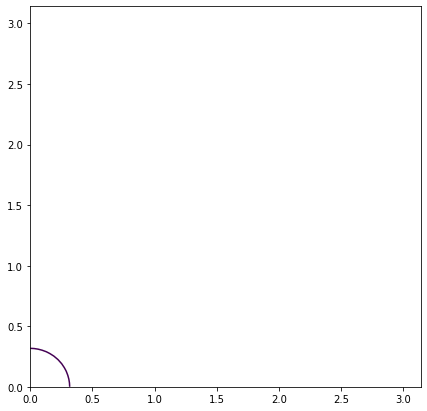

In [15]:
N=100
kx=np.linspace(0,np.pi,N)
ky=np.linspace(0,np.pi,N)
plt.rcParams['figure.figsize'] = [7,7]
Kx,Ky=np.meshgrid(kx,ky)
E=-2*(np.cos(Kx)+np.cos(Ky))
E_F=-3.9
CS=plt.contour(kx,ky,E,levels=[E_F],color='red')
Lambda0=np.pi/np.sqrt(2)
lambdaF=Lambda0*eps**np.linspace(0,steps-1,steps)
ThetaF,LambdaF=np.meshgrid(thetaF0,lambdaF)
Fwvfx_out = coordsFx_irr+LambdaF*np.cos(ThetaF)
Fwvfy_out = coordsFy_irr+LambdaF*np.sin(ThetaF)
EFwvf=-2*(np.cos(Fwvfx_out)+np.cos(Fwvfy_out))
EFwvfAvg=np.sum(EFwvf,axis=1)/len(thetaF0)
r=np.sqrt(EFwvfAvg[0]+4)

In [35]:
Temp0=2.9e-2 #low temperature in Kelvin
Temp1=5000   # high temperature in Kelvin
kB=1
factor=4/(np.pi)#1.147 (for E_F=-3.99) #1.16 (for E_F=-3.95) #1.177 (for E_F=-3.9), 1.212(for E_F=-3.8)
Lambda0Arr=factor*(np.pi/(np.sqrt(2)))*(1/2)**np.linspace(0,2,10)
Chi0Arr=np.zeros(10)
Chi1Arr=np.zeros(10)
E_F=-3.5 #-3.8
CS=plt.contour(kx,ky,E,levels=[E_F],color='red')
plt.clf()
coordsF = F.vertices
vF = np.dstack([2*np.sin(coordsF[:,0]),2*np.sin(coordsF[:,1])])[0]
vFmag = vF[:,0]*vF[:,0]+vF[:,1]*vF[:,1]
shatF  = vF/np.transpose([vFmag])
thetaF0 =  np.float64(np.arctan((vF[:,1]+1e-2)/(vF[:,0]+1e-2))) 
coordsFx_irr = coordsF[:,0]
coordsFy_irr = coordsF[:,1]
for i in range(1):
    Lambda0=Lambda0Arr[i]
    print(Lambda0)
    N=100
    steps=10000 #30000
    eps=(1-1/(N*N)) #0.9999
    E=-2*(np.cos(Kx)+np.cos(Ky))
    lambdaF=Lambda0*eps**np.linspace(0,steps-1,steps)
    ThetaF,LambdaF=np.meshgrid(thetaF0,lambdaF)
    Fwvfx_out = coordsFx_irr+LambdaF*np.cos(ThetaF)
    Fwvfy_out = coordsFy_irr+LambdaF*np.sin(ThetaF)
    EFwvf=-2*(np.cos(Fwvfx_out)+np.cos(Fwvfy_out))
    EFwvfAvg=np.sum(EFwvf,axis=1)/len(thetaF0)
    J=np.zeros(steps)
    J_0=1000              #1000 (fixed-1)
    J[0]=J_0/(N*N)
    k=0
    for j in range(len(lambdaF)-1):
        Ek=(EFwvfAvg[j]-E_F)
        if(Ek-J[0]/4>0):
            if(Ek-J[j]/4.>0):
                J[j+1]=J[j]+2*np.pi*r*J[j]*(1/((Ek)**2-J[j]**2/16))*J[j]*Ek
            else:
                Jfixed=4*Ek
                k=j
                J[j:]=4*Ek
                break
        else:
            if(Ek-J[j]/4<0):
                J[j+1]=J[j]+2*np.pi*r*J[j]*(1/((Ek)**2-J[j]**2/16))*J[j]*(Ek)
            else:
                Jfixed=4*Ek
                k=j
                J[j:]=4*Ek
                break
    Jstar=Jfixed
    print(Jstar)
    Chi0Arr[i]=(1/(4*kB*Temp0)+(1/(2*Jstar))*np.sinh(Jstar/(2*kB*Temp0)))/(1+np.cosh(Jstar/(2*kB*Temp0)))
    Chi1Arr[i]=(1/(4*kB*Temp1)+(1/(2*Jstar))*np.sinh(Jstar/(2*kB*Temp1)))/(1+np.cosh(Jstar/(2*kB*Temp1)))

2.8284271247461903
19.61298601806633


/home/neo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'color'
  if __name__ == '__main__':


<Figure size 504x504 with 0 Axes>

In [36]:
k

7

In [37]:
Lambda0=Lambda0Arr[0]
lambdaF=Lambda0*eps**np.linspace(0,steps-1,steps)
ThetaF,LambdaF=np.meshgrid(thetaF0,lambdaF)
Fwvfx_out = coordsFx_irr+LambdaF*np.cos(ThetaF)
Fwvfy_out = coordsFy_irr+LambdaF*np.sin(ThetaF)
EFwvf=-2*(np.cos(Fwvfx_out)+np.cos(Fwvfy_out))
EFwvfAvg=np.sum(EFwvf,axis=1)/len(thetaF0)

In [38]:
Tk=(EFwvfAvg[k]-E_F)*lambdaF[k]/Lambda0
4*Tk*Chi0Arr[0],Tk,2*Tk/Jstar

(0.4996501049825018, 4.899815261473591, 0.4996501049825018)

In [30]:
E_F

-3.5

In [858]:
Lambda0=Lambda0Arr[0]
lambdaF=Lambda0*eps**np.linspace(0,steps-1,steps)
ThetaF,LambdaF=np.meshgrid(thetaF0,lambdaF)
Fwvfx_out = coordsFx_irr+LambdaF*np.cos(ThetaF)
Fwvfy_out = coordsFy_irr+LambdaF*np.sin(ThetaF)
EFwvf=-2*(np.cos(Fwvfx_out)+np.cos(Fwvfy_out))
EFwvfAvg=np.sum(EFwvf,axis=1)/len(thetaF0)
J=np.zeros(steps)
J_0=1000#1000              #1000 (fixed-1)
J[0]=J_0/(N*N)
k=0
for j in range(len(lambdaF)-1):
    Ek=(EFwvfAvg[j]-E_F)
    if(Ek-J[0]/4>0):
        if(Ek-J[j]/4.>0):
            J[j+1]=J[j]+2*np.pi*r*J[j]*(1/((Ek)**2-J[j]**2/16))*J[j]*Ek
        else:
            Jfixed=4*Ek
            k=j
            J[j:]=4*Ek
            break
    else:
        if(Ek-J[j]/4<0):
            J[j+1]=J[j]+2*np.pi*r*J[j]*(1/((Ek)**2-J[j]**2/16))*J[j]*(Ek)
        else:
            Jfixed=4*Ek
            k=j
            J[j:]=4*Ek
            break
Jstar=Jfixed


In [859]:
Tk=(EFwvfAvg[k]-E_F)*lambdaF[k]/Lambda0

In [860]:
2*Tk/Jstar

0.4996501049825018

In [769]:
Temp=100**np.linspace(-0.8,1.7,100)#np.linspace(2.9e-2,5000,10000)
kB=1
Jstar=Jfixed
Chi=(1/(4*kB*Temp)+(1/(2*Jstar))*np.sinh(Jstar/(2*kB*Temp)))/(1+np.cosh(Jstar/(2*kB*Temp)))

In [757]:
Temp

array([2.51188643e-02, 2.82166240e-02, 3.16964118e-02, 3.56053412e-02,
       3.99963354e-02, 4.49288448e-02, 5.04696512e-02, 5.66937721e-02,
       6.36854767e-02, 7.15394265e-02, 8.03619571e-02, 9.02725178e-02,
       1.01405289e-01, 1.13910998e-01, 1.27958962e-01, 1.43739377e-01,
       1.61465896e-01, 1.81378522e-01, 2.03746853e-01, 2.28873736e-01,
       2.57099369e-01, 2.88805900e-01, 3.24422608e-01, 3.64431712e-01,
       4.09374901e-01, 4.59860665e-01, 5.16572536e-01, 5.80278345e-01,
       6.51840611e-01, 7.32228224e-01, 8.22529561e-01, 9.23967224e-01,
       1.03791459e+00, 1.16591440e+00, 1.30969967e+00, 1.47121711e+00,
       1.65265354e+00, 1.85646544e+00, 2.08541224e+00, 2.34259369e+00,
       2.63149179e+00, 2.95601798e+00, 3.32056603e+00, 3.73007163e+00,
       4.19007911e+00, 4.70681656e+00, 5.28728016e+00, 5.93932887e+00,
       6.67179086e+00, 7.49458302e+00, 8.41884522e+00, 9.45709117e+00,
       1.06233778e+01, 1.19334956e+01, 1.34051824e+01, 1.50583635e+01,
      

In [766]:
Tk

4.137554070259932

### $4T_{k}\chi$ vs $T/T_{k}$

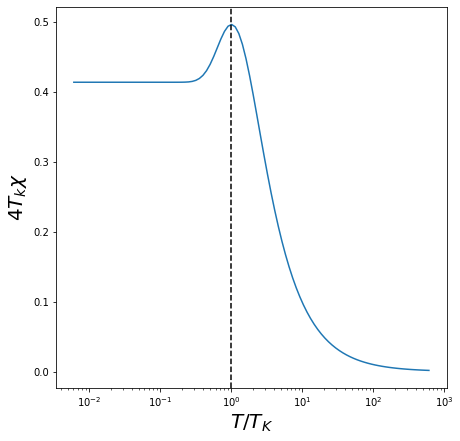

In [759]:
figure,ax=plt.subplots()
ax.set_xscale('log')
ax.set_xlabel(r'$T/T_{K}$',fontsize=20)
ax.set_ylabel(r'$4T_{k}\chi$',fontsize=20)
ax.tick_params(labelsize=10)
ax.plot(Temp/Tk,Chi*Tk*4)
ax.axvline(x=1,color='k',linestyle='--')
plt.savefig('TkChivsTemp.png')

In [776]:
Chi[0]*Tk*4

0.41348692958910144

In [774]:
Tk,Jstar

(4.137554070259932, 20.01298601806633)

In [775]:
2*Tk/Jstar

0.41348692958910144

In [853]:
#Tracking the maximum value of Chi*Tk vs T/Tk curve
Temp=np.linspace(2.9e-2,5000,1000)#100**np.linspace(-0.8,1.7,1000)
J_0Arr=np.array([10,100,1000,10000])              
TforChiMax=np.zeros(len(J_0Arr))
ChiMax=np.zeros(len(J_0Arr))
ChiSat=np.zeros(len(J_0Arr))
JfixedArr=np.zeros(len(J_0Arr))
TkondoArr=np.zeros(len(J_0Arr))
for i in range(len(J_0Arr)): 
    J=np.zeros(steps)
    J[0]=J_0Arr[i]/(N*N)
    k=0
    for j in range(len(lambdaF)-1):
        Ek=(EFwvfAvg[j]-E_F)
        if(Ek-J[0]/4>0):
            if(Ek-J[j]/4.>0):
                J[j+1]=J[j]+2*np.pi*r*J[j]*(1/((Ek)**2-J[j]**2/16))*J[j]*Ek
            else:
                Jfixed=4*Ek
                k=j
                J[j:]=4*Ek
                break
        else:
            if(Ek-J[j]/4<0):
                J[j+1]=J[j]+2*np.pi*r*J[j]*(1/((Ek)**2-J[j]**2/16))*J[j]*(Ek)
            else:
                Jfixed=4*Ek
                k=j
                J[j:]=4*Ek
                break
    JfixedArr[i]=Jfixed
    TkondoArr[i]=(EFwvfAvg[k]-E_F)*lambdaF[k]/Lambda0
    print(TkondoArr[i],JfixedArr[i],2*TkondoArr[i]/JfixedArr[i])
    Chi=(1/(4*kB*Temp)+(1/(2*Jstar))*np.sinh(Jstar/(2*kB*Temp)))/(1+np.cosh(Jstar/(2*kB*Temp)))
    ChiMax[i]=np.max(Chi)
    TforChiMax[i]=Temp[np.where(Chi==np.max(Chi))[0][0]]

3.8914242847523695 16.060633553193647 0.48459162857601745
4.112979341101236 16.51290526613686 0.49815332611830027
4.137554070259932 16.561806067887577 0.49965010498250184
4.141659135302623 16.569950365584102 0.4999000050000001


In [845]:
4*ChiMax*Tk

array([0.48804764, 0.48804764, 0.48804764, 0.48804764])

In [846]:
TforChiMax/TkondoArr

array([1.29360759, 1.22392445, 1.21665503, 1.21544913])

In [847]:
JfixedArr

array([16.06063355, 16.51290527, 16.56180607, 16.56995037])

In [848]:
TkondoArr

array([3.89142428, 4.11297934, 4.13755407, 4.14165914])

In [851]:
ChiSat=2*TkondoArr[2]/JfixedArr[2]

In [852]:
ChiSat

0.49965010498250184

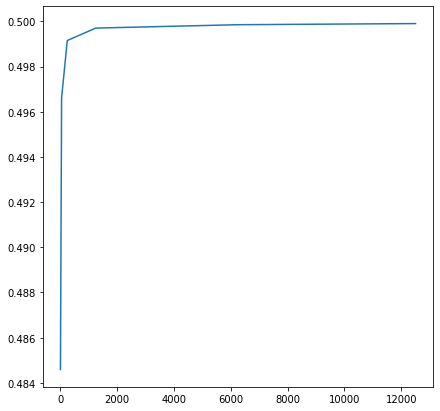

In [816]:
plt.plot(J_0Arr,ChiSat)